In [1]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd   
import matplotlib.pyplot as plt

import math
import os
import re
import csv
os.chdir('/Users/parkhun/Documents/open')

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
submission = pd.read_csv('sample_submission.csv')

In [3]:
train.isnull().sum()

index               0
gender              0
car                 0
reality             0
child_num           0
income_total        0
income_type         0
edu_type            0
family_type         0
house_type          0
DAYS_BIRTH          0
DAYS_EMPLOYED       0
FLAG_MOBIL          0
work_phone          0
phone               0
email               0
occyp_type       8171
family_size         0
begin_month         0
credit              0
dtype: int64

In [4]:
test.isnull().sum()

index               0
gender              0
car                 0
reality             0
child_num           0
income_total        0
income_type         0
edu_type            0
family_type         0
house_type          0
DAYS_BIRTH          0
DAYS_EMPLOYED       0
FLAG_MOBIL          0
work_phone          0
phone               0
email               0
occyp_type       3152
family_size         0
begin_month         0
dtype: int64

In [5]:
train=train.drop('occyp_type', axis=1)
test=test.drop('occyp_type', axis=1)

In [6]:
train['gender'] = train['gender'].replace(['F','M'],[0,1])
test['gender'] = test['gender'].replace(['F','M'],[0,1])
print('gender :')
print(train['gender'].value_counts())
print('--------------')

print('Having a car or not : ')
train['car'] = train['car'].replace(['N','Y'],[0,1])
test['car'] = test['car'].replace(['N','Y'],[0,1])
print(train['car'].value_counts())
print('--------------')

print('Having house reality or not: ')
train['reality'] = train['reality'].replace(['N','Y'],[0,1])
test['reality'] = test['reality'].replace(['N','Y'],[0,1])
print(train['reality'].value_counts())

gender :
0    17697
1     8760
Name: gender, dtype: int64
--------------
Having a car or not : 
0    16410
1    10047
Name: car, dtype: int64
--------------
Having house reality or not: 
1    17830
0     8627
Name: reality, dtype: int64


In [7]:
train["DAYS_EMPLOYED"] =-round(train["DAYS_EMPLOYED"]/365)
train["DAYS_BIRTH"] =-round(train["DAYS_BIRTH"]/365,-1)
train["begin_month"] =-round(train["begin_month"]/12)
train.head()

index  gender  car  reality  child_num  income_total           income_type  \
0      0       0    0        0          0      202500.0  Commercial associate   
1      1       0    0        1          1      247500.0  Commercial associate   
2      2       1    1        1          0      450000.0               Working   
3      3       0    0        1          0      202500.0  Commercial associate   
4      4       0    1        1          0      157500.0         State servant   

                        edu_type     family_type           house_type  \
0               Higher education         Married  Municipal apartment   
1  Secondary / secondary special  Civil marriage    House / apartment   
2               Higher education         Married    House / apartment   
3  Secondary / secondary special         Married    House / apartment   
4               Higher education         Married    House / apartment   

   DAYS_BIRTH  DAYS_EMPLOYED  FLAG_MOBIL  work_phone  phone  email  \
0        40.0           13.0           1           0      0      0   
1        30.0            4.0           1           0      0      1   
2        50.0           12.0           1           0      1      0   
3        40.0            6.0           1           0      1      0   
4        40.0            6.0           1           0      0      0   

   family_size  begin_month  credit  
0          2.0          0.0     1.0  
1          3.0          0.0     1.0  
2          2.0          2.0     2.0  
3          2.0          3.0     0.0  
4          2.0          2.0     2.0

In [8]:
test["DAYS_EMPLOYED"] =-round(test["DAYS_EMPLOYED"]/365)
test["DAYS_BIRTH"] =-round(test["DAYS_BIRTH"]/365,-1)
test["begin_month"] =-round(test["begin_month"]/12)
test.head()

index  gender  car  reality  child_num  income_total           income_type  \
0  26457       1    1        0          0      112500.0             Pensioner   
1  26458       0    0        1          0      135000.0         State servant   
2  26459       0    0        1          0       69372.0               Working   
3  26460       1    1        0          0      112500.0  Commercial associate   
4  26461       0    1        1          0      225000.0         State servant   

                        edu_type     family_type         house_type  \
0  Secondary / secondary special  Civil marriage  House / apartment   
1               Higher education         Married  House / apartment   
2  Secondary / secondary special         Married  House / apartment   
3  Secondary / secondary special         Married  House / apartment   
4               Higher education         Married  House / apartment   

   DAYS_BIRTH  DAYS_EMPLOYED  FLAG_MOBIL  work_phone  phone  email  \
0        60.0        -1001.0           1           0      1      0   
1        50.0           24.0           1           0      1      0   
2        40.0            1.0           1           1      1      0   
3        50.0            7.0           1           1      0      0   
4        50.0           26.0           1           1      0      0   

   family_size  begin_month  
0          2.0          5.0  
1          2.0          3.0  
2          2.0          3.0  
3          2.0          3.0  
4          2.0          1.0

In [9]:
train['income_total'] = train['income_total']/10000 
test['income_total'] = test['income_total']/10000 

(2.544, 18.18]      16212
(18.18, 33.66]       8330
(33.66, 49.14]       1530
(49.14, 64.62]        206
(64.62, 80.1]         121
(80.1, 95.58]          44
(95.58, 111.06]         3
(111.06, 126.54]        2
(126.54, 142.02]        4
(142.02, 157.5]         5
Name: income_total, dtype: int64


<AxesSubplot:ylabel='Frequency'>

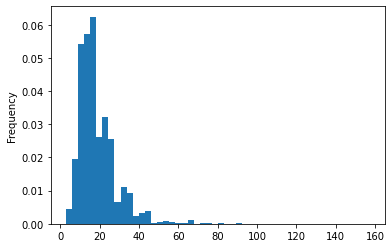

In [10]:
print(train['income_total'].value_counts(bins=10,sort=False))
train['income_total'].plot(kind='hist',bins=50,density=True)

In [11]:
train=train.drop('child_num', axis=1)
test=test.drop('child_num', axis=1)

In [12]:
train.loc[train['family_size'] >= 4, 'family_size'] = 4
train.loc[train['DAYS_EMPLOYED'] >= 45, 'DAYS_EMPLOYED'] = 45

In [13]:
train['family_size'].value_counts()


2.0    14106
1.0     5109
3.0     4632
4.0     2610
Name: family_size, dtype: int64

In [14]:
train['DAYS_EMPLOYED'].value_counts()

-1001.0    4438
 1.0       2322
 2.0       2168
 3.0       2159
 4.0       2023
 5.0       1761
 6.0       1486
 7.0       1404
 8.0       1253
 9.0       1118
 10.0       877
 0.0        680
 11.0       665
 15.0       556
 12.0       532
 13.0       492
 14.0       355
 20.0       237
 17.0       225
 16.0       207
 19.0       203
 18.0       171
 21.0       158
 22.0       129
 23.0       115
 24.0        96
 27.0        87
 25.0        84
 26.0        84
 28.0        67
 29.0        55
 33.0        42
 30.0        42
 31.0        29
 41.0        28
 34.0        25
 32.0        21
 35.0        20
 36.0        11
 40.0         9
 38.0         8
 37.0         7
 39.0         5
 43.0         3
Name: DAYS_EMPLOYED, dtype: int64

In [15]:
for i in range(len(train['DAYS_EMPLOYED'])):
    a = train['DAYS_EMPLOYED'][i]
    if a < 20:
        train['DAYS_EMPLOYED'][i] = 10
    elif a < 30:
        train['DAYS_EMPLOYED'][i] = 20
    elif a < 40:
        train['DAYS_EMPLOYED'][i] = 30
    elif a < 50:
        train['DAYS_EMPLOYED'][i] = 40
    
    
train['DAYS_EMPLOYED'].value_counts()

10.0    25095
20.0     1112
30.0      210
40.0       40
Name: DAYS_EMPLOYED, dtype: int64

In [16]:
for i in range(len(test['DAYS_EMPLOYED'])):
    a = test['DAYS_EMPLOYED'][i]
    if a < 20:
        test['DAYS_EMPLOYED'][i] = 10
    elif a < 30:
        test['DAYS_EMPLOYED'][i] = 20
    elif a < 40:
        test['DAYS_EMPLOYED'][i] = 30
    elif a < 50:
        test['DAYS_EMPLOYED'][i] = 40
    
    
train['DAYS_EMPLOYED'].value_counts()

10.0    25095
20.0     1112
30.0      210
40.0       40
Name: DAYS_EMPLOYED, dtype: int64

In [17]:
train.groupby('DAYS_EMPLOYED').size()

DAYS_EMPLOYED
10.0    25095
20.0     1112
30.0      210
40.0       40
dtype: int64

In [18]:
test.groupby('DAYS_EMPLOYED').size()

DAYS_EMPLOYED
10.0    9486
20.0     421
30.0      82
40.0      11
dtype: int64

In [19]:
train.head()

index  gender  car  reality  income_total           income_type  \
0      0       0    0        0         20.25  Commercial associate   
1      1       0    0        1         24.75  Commercial associate   
2      2       1    1        1         45.00               Working   
3      3       0    0        1         20.25  Commercial associate   
4      4       0    1        1         15.75         State servant   

                        edu_type     family_type           house_type  \
0               Higher education         Married  Municipal apartment   
1  Secondary / secondary special  Civil marriage    House / apartment   
2               Higher education         Married    House / apartment   
3  Secondary / secondary special         Married    House / apartment   
4               Higher education         Married    House / apartment   

   DAYS_BIRTH  DAYS_EMPLOYED  FLAG_MOBIL  work_phone  phone  email  \
0        40.0           10.0           1           0      0      0   
1        30.0           10.0           1           0      0      1   
2        50.0           10.0           1           0      1      0   
3        40.0           10.0           1           0      1      0   
4        40.0           10.0           1           0      0      0   

   family_size  begin_month  credit  
0          2.0          0.0     1.0  
1          3.0          0.0     1.0  
2          2.0          2.0     2.0  
3          2.0          3.0     0.0  
4          2.0          2.0     2.0

In [20]:
# 상관도가 높은 family_size 와 child_num 중 child_num 을 제거후의 상관도
# family_size 안에 child_num이 포함되어 있기 떄문에 child_num 제거
import matplotlib.pyplot as plt

plt.figure(figsize =(10,10))
corr = train.corr()


<Figure size 720x720 with 0 Axes>

In [21]:
import matplotlib.pyplot as plt

plt.figure(figsize =(10,10))
corr = test.corr()


<Figure size 720x720 with 0 Axes>

In [22]:
train.head()

index  gender  car  reality  income_total           income_type  \
0      0       0    0        0         20.25  Commercial associate   
1      1       0    0        1         24.75  Commercial associate   
2      2       1    1        1         45.00               Working   
3      3       0    0        1         20.25  Commercial associate   
4      4       0    1        1         15.75         State servant   

                        edu_type     family_type           house_type  \
0               Higher education         Married  Municipal apartment   
1  Secondary / secondary special  Civil marriage    House / apartment   
2               Higher education         Married    House / apartment   
3  Secondary / secondary special         Married    House / apartment   
4               Higher education         Married    House / apartment   

   DAYS_BIRTH  DAYS_EMPLOYED  FLAG_MOBIL  work_phone  phone  email  \
0        40.0           10.0           1           0      0      0   
1        30.0           10.0           1           0      0      1   
2        50.0           10.0           1           0      1      0   
3        40.0           10.0           1           0      1      0   
4        40.0           10.0           1           0      0      0   

   family_size  begin_month  credit  
0          2.0          0.0     1.0  
1          3.0          0.0     1.0  
2          2.0          2.0     2.0  
3          2.0          3.0     0.0  
4          2.0          2.0     2.0

In [23]:
train['FLAG_MOBIL'].value_counts()


1    26457
Name: FLAG_MOBIL, dtype: int64

In [24]:
test['FLAG_MOBIL'].value_counts()

1    10000
Name: FLAG_MOBIL, dtype: int64

In [25]:
print('edu_type 종류 : ',list(train.edu_type.unique()))
edu_order = {
    'Lower secondary' : 0, # 중학교 미만
    'Secondary / secondary special' : 1, #중학교
    'Incomplete higher' : 2, # 고등학교 중퇴
    'Higher education' : 3, # 고등학교 졸업
     'Academic degree' : 4 # 학사 이상
}
train.edu_type = train.edu_type.map(edu_order)
display(train[['edu_type']].head())

edu_type 종류 :  ['Higher education', 'Secondary / secondary special', 'Incomplete higher', 'Lower secondary', 'Academic degree']


edu_type
0         3
1         1
2         3
3         1
4         3

In [26]:
print('edu_type 종류 : ',list(test.edu_type.unique()))
edu_order = {
    'Lower secondary' : 0, # 중학교 미만
    'Secondary / secondary special' : 1, #중학교
    'Incomplete higher' : 2, # 고등학교 중퇴
    'Higher education' : 3, # 고등학교 졸업
     'Academic degree' : 4 # 학사 이상
}
test.edu_type = test.edu_type.map(edu_order)
display(test[['edu_type']].head())

edu_type 종류 :  ['Secondary / secondary special', 'Higher education', 'Lower secondary', 'Incomplete higher', 'Academic degree']


edu_type
0         1
1         3
2         1
3         1
4         3

In [27]:
print('income_type 종류 : ',list(train.income_type.unique()))
income_order = {
    'Student' : 0, # 학생
    'Pensioner' : 1, #연금수령자
    'State servant' : 2, # 공무원
    'Working' : 3, # 회사원
    'Commercial associate' : 4 # 사엽
}
train.income_type = train.income_type.map(income_order)
display(train[['income_type']].head())

income_type 종류 :  ['Commercial associate', 'Working', 'State servant', 'Pensioner', 'Student']


income_type
0            4
1            4
2            3
3            4
4            2

In [28]:
print('income_type 종류 : ',list(test.income_type.unique()))
income_order = {
    'Student' : 0, # 학생
    'Pensioner' : 1, #연금수령자
    'State servant' : 2, # 공무원
    'Working' : 3, # 회사원
    'Commercial associate' : 4 # 사엽
}
test.income_type = test.income_type.map(income_order)
display(test[['income_type']].head())

income_type 종류 :  ['Pensioner', 'State servant', 'Working', 'Commercial associate', 'Student']


income_type
0            1
1            2
2            3
3            4
4            2

In [29]:
print('family_type 종류 : ',list(train.family_type.unique()))
family_order = {
    'Widow' : 0, # 과부
    'Single / not married' : 1, # 미혼
    'Separated' : 2, # 이혼
    'Civil marriage' : 3, # 민사적 혼인
    'Married' : 4 # 기혼
}
train.family_type = train.family_type.map(family_order)
display(train[['family_type']].head())

family_type 종류 :  ['Married', 'Civil marriage', 'Separated', 'Single / not married', 'Widow']


family_type
0            4
1            3
2            4
3            4
4            4

In [30]:
print('family_type 종류 : ',list(test.family_type.unique()))
family_order = {
    'Widow' : 0, # 과부
    'Single / not married' : 1, # 미혼
    'Separated' : 2, # 이혼
    'Civil marriage' : 3, # 민사적 혼인
    'Married' : 4 # 기혼
}
test.family_type = test.family_type.map(family_order)
display(test[['family_type']].head())

family_type 종류 :  ['Civil marriage', 'Married', 'Single / not married', 'Widow', 'Separated']


family_type
0            3
1            4
2            4
3            4
4            4

In [31]:
print('house_type 종류 : ',list(train.house_type.unique()))
house_order = {
    'Office apartment' : 0, # 사무실 
    'Rented apartment' : 1, # 임대 
    'Co-op apartment' : 2, # 작은 아파트
    'With parents' : 3, # 부모님 함께
    'House / apartment' : 4, # 집 / 아파트 
    'Municipal apartment' : 5 # 고급 아파트 
}
train.house_type = train.house_type.map(house_order)
display(train[['house_type']].head())


house_type 종류 :  ['Municipal apartment', 'House / apartment', 'With parents', 'Co-op apartment', 'Rented apartment', 'Office apartment']


house_type
0           5
1           4
2           4
3           4
4           4

In [32]:
print('house_type 종류 : ',list(test.house_type.unique()))
house_order = {
    'Office apartment' : 0, # 사무실 
    'Rented apartemnt' : 1, # 임대 
    'Co-op apartment' : 2, # 작은 아파트
    'With parents' : 3, # 부모님 함께
    'House / apartment' : 4, # 집 / 아파트 
    'Municipal apartment' : 5 # 고급 아파트 
}
test.house_type = test.house_type.map(house_order)
display(test[['house_type']].head())

house_type 종류 :  ['House / apartment', 'With parents', 'Rented apartment', 'Municipal apartment', 'Office apartment', 'Co-op apartment']


house_type
0         4.0
1         4.0
2         4.0
3         4.0
4         4.0

In [33]:
train

index  gender  car  reality  income_total  income_type  edu_type  \
0          0       0    0        0         20.25            4         3   
1          1       0    0        1         24.75            4         1   
2          2       1    1        1         45.00            3         3   
3          3       0    0        1         20.25            4         1   
4          4       0    1        1         15.75            2         3   
...      ...     ...  ...      ...           ...          ...       ...   
26452  26452       0    0        0         22.50            2         1   
26453  26453       0    0        1         18.00            3         3   
26454  26454       0    1        0         29.25            3         1   
26455  26455       1    0        1         17.10            3         2   
26456  26456       0    0        0          8.10            3         1   

       family_type  house_type  DAYS_BIRTH  DAYS_EMPLOYED  FLAG_MOBIL  \
0                4           5        40.0           10.0           1   
1                3           4        30.0           10.0           1   
2                4           4        50.0           10.0           1   
3                4           4        40.0           10.0           1   
4                4           4        40.0           10.0           1   
...            ...         ...         ...            ...         ...   
26452            4           4        30.0           10.0           1   
26453            2           4        40.0           10.0           1   
26454            3           3        30.0           10.0           1   
26455            1           4        30.0           10.0           1   
26456            3           4        50.0           10.0           1   

       work_phone  phone  email  family_size  begin_month  credit  
0               0      0      0          2.0          0.0     1.0  
1               0      0      1          3.0          0.0     1.0  
2               0      1      0          2.0          2.0     2.0  
3               0      1      0          2.0          3.0     0.0  
4               0      0      0          2.0          2.0     2.0  
...           ...    ...    ...          ...          ...     ...  
26452           0      0      0          4.0          0.0     1.0  
26453           0      0      0          2.0          4.0     2.0  
26454           0      0      0          2.0          2.0     2.0  
26455           0      0      0          1.0          5.0     2.0  
26456           0      0      0          2.0          1.0     2.0  

[26457 rows x 18 columns]

In [34]:
test

index  gender  car  reality  income_total  income_type  edu_type  \
0     26457       1    1        0       11.2500            1         1   
1     26458       0    0        1       13.5000            2         3   
2     26459       0    0        1        6.9372            3         1   
3     26460       1    1        0       11.2500            4         1   
4     26461       0    1        1       22.5000            2         3   
...     ...     ...  ...      ...           ...          ...       ...   
9995  36452       0    1        1       20.2500            3         2   
9996  36453       1    1        1       20.2500            3         1   
9997  36454       0    0        1       29.2500            3         1   
9998  36455       0    1        0       18.0000            4         1   
9999  36456       0    0        1       27.0000            3         3   

      family_type  house_type  DAYS_BIRTH  DAYS_EMPLOYED  FLAG_MOBIL  \
0               3         4.0        60.0           10.0           1   
1               4         4.0        50.0           20.0           1   
2               4         4.0        40.0           10.0           1   
3               4         4.0        50.0           10.0           1   
4               4         4.0        50.0           20.0           1   
...           ...         ...         ...            ...         ...   
9995            4         4.0        50.0           10.0           1   
9996            3         4.0        30.0           10.0           1   
9997            4         4.0        60.0           30.0           1   
9998            4         4.0        50.0           10.0           1   
9999            4         4.0        30.0           10.0           1   

      work_phone  phone  email  family_size  begin_month  
0              0      1      0          2.0          5.0  
1              0      1      0          2.0          3.0  
2              1      1      0          2.0          3.0  
3              1      0      0          2.0          3.0  
4              1      0      0          2.0          1.0  
...          ...    ...    ...          ...          ...  
9995           1      1      0          2.0          2.0  
9996           1      0      0          2.0          3.0  
9997           0      0      0          2.0          5.0  
9998           0      1      0          2.0          3.0  
9999           0      0      1          2.0          1.0  

[10000 rows x 17 columns]

In [35]:
# 연락처는 이미 모든 사람들이 존재하기 떄문에 연락 방법에 대한 것들은 전부 drop 하고 나머지만 추출
columns = ['gender','car','reality','income_total', 'income_type', 'family_type', 'house_type', 'DAYS_BIRTH', 'DAYS_EMPLOYED','begin_month','credit']
train[columns].describe()

gender           car       reality  income_total  income_type  \
count  26457.000000  26457.000000  26457.000000  26457.000000  26457.00000   
mean       0.331103      0.379748      0.673924     18.730652      2.81589   
std        0.470619      0.485333      0.468784     10.187837      0.97826   
min        0.000000      0.000000      0.000000      2.700000      0.00000   
25%        0.000000      0.000000      0.000000     12.150000      3.00000   
50%        0.000000      0.000000      1.000000     15.750000      3.00000   
75%        1.000000      1.000000      1.000000     22.500000      3.00000   
max        1.000000      1.000000      1.000000    157.500000      4.00000   

        family_type    house_type    DAYS_BIRTH  DAYS_EMPLOYED   begin_month  \
count  26457.000000  26457.000000  26457.000000   26457.000000  26457.000000   
mean       3.240239      3.897721     43.699588      10.624409      2.160373   
std        1.261761      0.587750     11.716340       2.889487      1.434258   
min        0.000000      0.000000     20.000000      10.000000      0.000000   
25%        3.000000      4.000000     30.000000      10.000000      1.000000   
50%        4.000000      4.000000     40.000000      10.000000      2.000000   
75%        4.000000      4.000000     50.000000      10.000000      3.000000   
max        4.000000      5.000000     70.000000      40.000000      5.000000   

             credit  
count  26457.000000  
mean       1.519560  
std        0.702283  
min        0.000000  
25%        1.000000  
50%        2.000000  
75%        2.000000  
max        2.000000

In [36]:
# test의 경우 'credit'이 없다.
column = ['gender','car','reality','income_total', 'income_type', 'family_type', 'house_type', 'DAYS_BIRTH', 'DAYS_EMPLOYED','begin_month']
test[column].describe()

gender           car       reality  income_total   income_type  \
count  10000.00000  10000.000000  10000.000000  10000.000000  10000.000000   
mean       0.32670      0.379600      0.667600     18.504332      2.803900   
std        0.46903      0.485312      0.471097     10.153979      0.978949   
min        0.00000      0.000000      0.000000      2.700000      0.000000   
25%        0.00000      0.000000      0.000000     12.150000      2.000000   
50%        0.00000      0.000000      1.000000     15.750000      3.000000   
75%        1.00000      1.000000      1.000000     22.500000      3.000000   
max        1.00000      1.000000      1.000000    157.500000      4.000000   

        family_type   house_type   DAYS_BIRTH  DAYS_EMPLOYED   begin_month  
count  10000.000000  9854.000000  10000.00000   10000.000000  10000.000000  
mean       3.233500     3.937792     43.85400      10.618000      2.167200  
std        1.267493     0.469821     11.68248       2.845854      1.416773  
min        0.000000     0.000000     20.00000      10.000000      0.000000  
25%        3.000000     4.000000     30.00000      10.000000      1.000000  
50%        4.000000     4.000000     40.00000      10.000000      2.000000  
75%        4.000000     4.000000     50.00000      10.000000      3.000000  
max        4.000000     5.000000     70.00000      40.000000      5.000000

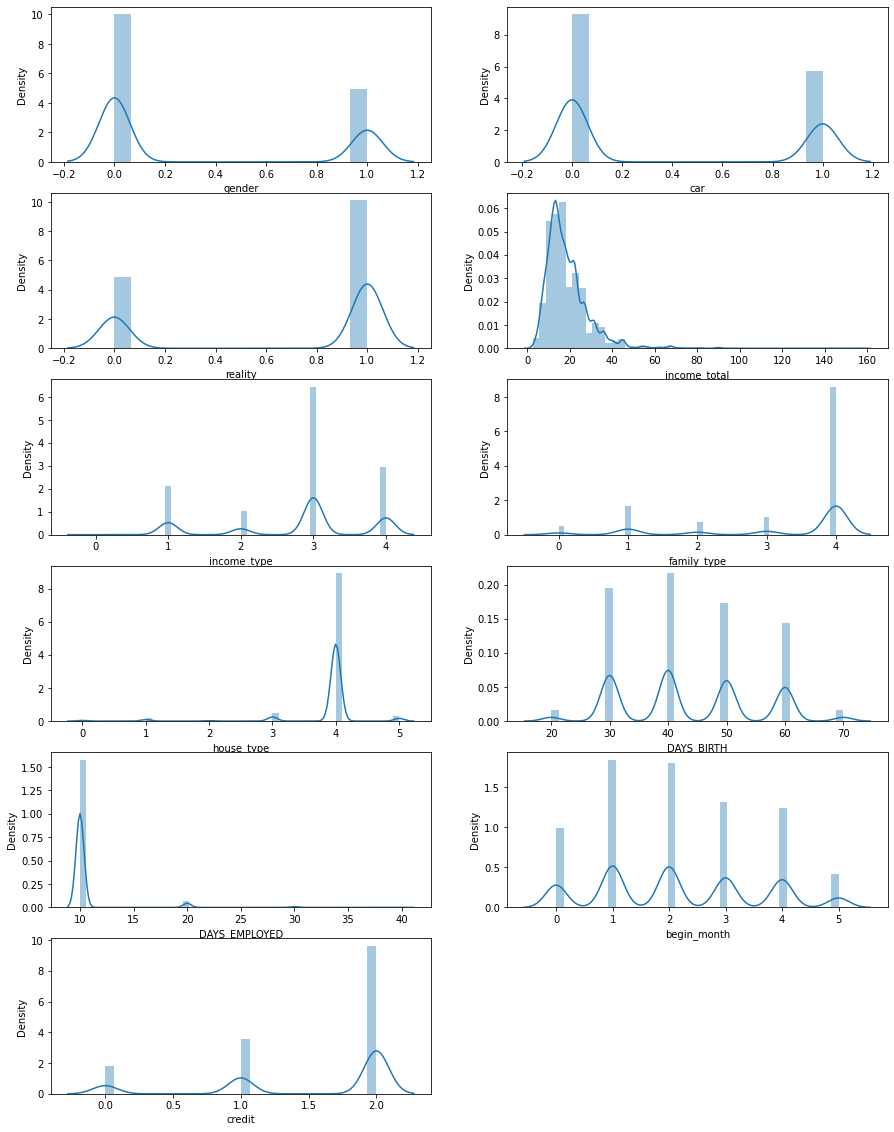

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize = (15,20))
for i in range(11):
    plt.subplot(6,2,i+1)
    sns.distplot(train[columns[i]])
plt.show()

In [38]:
# 남녀 비율 0 > 1
# 차의 유무 0 > 1
# 부동산 0 < 1
# income_tatal ..
# 회사원(3)
# 기혼자
# 집 이나 아파트 
# 40대 (20대나 와 70대는 거의 없음) 40> 30> 50> 60
# 일한 년수 10년차 
# 대출 시작 날 ...
# 연체 2가 많음

ValueError: num must be 1 <= num <= 10, not 11

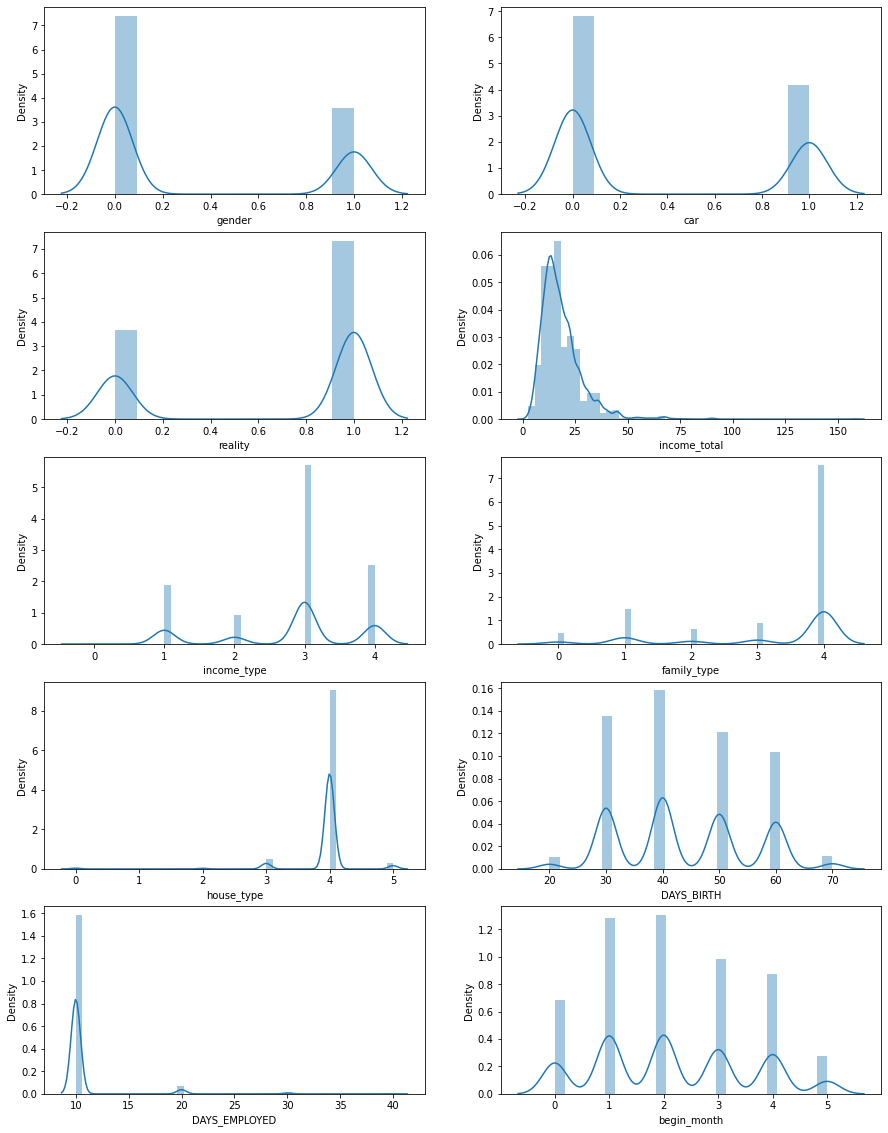

In [39]:
plt.figure(figsize = (15,20))
for i in range(11):
    plt.subplot(5,2,i+1)
    sns.distplot(test[column[i]])
plt.show()

In [ ]:
# Gender 0 > 1
# Car 0 > 1
# 부동산 0 < 1
# income_total ..
# 회사원(3)
# 기혼
# 집 / 아파트
# 40대(train 과 동일)
# 10년차 
# begin_month .. 

In [ ]:
train[columns].shape

## **인공 신경망**

In [ ]:
# 퍼셉트론
# 입력 신호가 들어오면 각 입력으로 부터 받아들이는 가중치를 곱한 후 합한 값을 출력으로 내는 데
# 이 때 해당 출력 값이 특정임계 값을 넘을 경우 신호가 생성되고 출력을 전달하는 식의 표현 

# 1. 가중치를 0 또는 랜덤한 작은 값으로 초기화
# 2. 각 훈련 샘플에서 출력 값을 계산하고 가중치를 업데이트 한다.

In [ ]:
# 퍼셉트론 API 구현

class perceptron:
    def __init__(self, eta=0.01, n_iter=50, random_state=1):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state
    
    def fit(self, x, y):
        rgen = np.random.RandomState(self.random_state)
        self.w = rgen.normal(loc=0.0, scale=0.01, size =1 + x.shape[1])
        
        self.errors = []
        
        for _ in range(self.n_iter):
            errors = 0
            for xi, target in zip(x,y):
                update = self.eta * (target - self.predict(xi))
                self.w[1:] += update * xi
                self.w[0] += update
                errors += int(update != 0.0)
            
            self.errors.append(errors)
        
        return self
    
    def net_input(self,x):
        return np.dot(x, self.w[1:] + self.w[0])
    
    def prdict(self, x):
        return np.where(self.net_input(x) >= 0.0, 1, -1)
    

In [ ]:
train[columns]

In [ ]:
train[columns].iloc[:,3].values

In [ ]:
train[columns].iloc[:,10].values

In [ ]:
y = train[columns].iloc[:,10].values
y = np.where(y == 2.0, -1, 1) # credit = 2인 경우에만 True(-1출력)
x = train[columns].iloc[:, [3,4]].values

plt.scatter(x[0:50,0], x[0:50,1], color='red', marker='o', label = '1')
plt.scatter(x[50:100,0], x[50:100,1], color='blue', marker = 'x', label = '2')
plt.xlabel('income_total')
plt.ylabel('income_type')
plt.legend(loc='upper left')
plt.show()


# ppn = perceptron(eta = 0.1, n_iter = 10)
# ppn.fit(x,y)
# plt.plot(range(1, len(ppn.errors) + 1), ppn.errors, marker = 'o')
# plt.xlabel('Epochs')
# plt.ylabel('Number of Errors')
# plot.show()

In [ ]:
# 아달린 알고리즘(적응력 선현 뉴런)
# 진짜 클래스 레이브로과 선형 활성 함수의 실수 출력값을 비교해 모델의 오차를 계산하고 가중치를 업데이드
# 레이블 간의 오차를 계산하는 퍼셉트론 보다 선능이 높다.



In [ ]:
class AdalineGD(object):
    def __init__(self, eta=0.01, n_iter=50, random_state=1):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state
    
    def fit(self, x, y):
        rgen = np.random.RandomState(self.random_state)
        self.w = rgen.normal(loc = 0.0, scale = 0.01, size = 1 + x.shape[1])
        self.costs = []
    
        for i in range(self.n_iter):
            net_input = self.net_input(x)
            output = self.activate(net_input)
            errors = y - output
            self.w[1:] += self.eta * x.T.dot(errors)
            self.w[0] += self.eta * errors.sum()
            cost = (errors**2).sum() / 2.0
            self.costs.append(cost)
        return self
    
    def net_input(self,x):
        return np.dot(x, self.w[1:]) + self.w[0]
    
    def activate(self,x):
        return x
    
    def predict(self, x):
        return np.where(self.activate(self.net_input(x)) >= 0.0, 1, -1)

In [ ]:
y = train[columns].iloc[:,10].values
y = np.where(y == 1.0, -1, 1)
x = train[columns].iloc[:, [3,4]].values

fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize=(10,4))

ada1 = AdalineGD(n_iter=10, eta=0.01).fit(x,y)
ada2 = AdalineGD(n_iter=10, eta=0.0001).fit(x,y)

ax[0].plot(range(1, len(ada1.costs) + 1), np.log10(ada1.costs), marker = 'o')
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('log(Sum-Squared Error)')
ax[0].set_title('Adaline - Learning_rate = 0.01')

ax[1].plot(range(1, len(ada2.costs) + 1), np.log10(ada2.costs), marker = 'o')
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Sum-Squared Error')
ax[1].set_title('Adaline - Learning_rate = 0.0001')

In [ ]:
# 학습률을 높게 잡아서 함수가 최소화 되지 못하고 오차가 증가 점점 증가 한다.
# 그렇기에 표준화가 필요하다.

In [ ]:
x_std = np.copy(x)
x_std[:,0] = (x[:,0]-x[:,0].mean()) / x[:,0].std()
x_std[:,1] = (x[:,1]-x[:,1].mean()) / x[:,1].std()

ada_standard = AdalineGD(n_iter=15, eta = 0.01)
ada_standard.fit(x_std,y)

plt.scatter(x[0:50,0], x[0:50,1], color='red', marker='o', label = 'setosa')
plt.scatter(x[50:100,0], x[50:100,1], color='blue', marker = 'x', label = 'ver')
plt.xlabel('income_total')
plt.ylabel('income_type')
plt.legend(loc='upper left')
plt.show()

plt.plot(range(1, len(ada_standard.costs)+1), ada_standard.costs, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Sum-Squared Error')
plt.show()

In [ ]:
#다층 신경망 구조
# 신경망을 구성하는 모든 노드가 전부 연결되어 있는, 완전 네트워크인 다층 퍼셉트론
# 입력층 -> 은닉층 -> 출력층
# 입력층 : 입력 갯수만큼 노드가 생성
# 은닉층 : 입력층으로 부터 넘어온 데이터를 처리하는 계층
# 출력층

In [ ]:
train_x=train.drop('credit', axis=1)
train_y=train[['credit']]
test_x=test

In [ ]:
print(train_x.shape, train_y.shape, test.shape)

In [ ]:
import struct

def load_mnist(path, king="train"):
    label_path = os.path.join(path, '%s-labels-idx1-ubyte' %kind)
    image_path = os.path.join(path, '%s-images-idx3-ubyte' %kind)
    
    with open(label_path, 'rb') as lbpath:
        magic, n = struct.unpack('>II', lbpath.read(8))
        # >: 빅 엔디언을 의미
        # I: 부호가 없는 정수를 의미
        labels = np.fromfile(lbpath, dtype=np.unit8)
        
    with open(image_path, 'rb') as impath:
        magic, num, rows, cols = struct.unpack('>IIII', imgpath.read(16))
        images = np.fromfile(imgpath, dtype=np.unit8).reshape(len(labels),784)
        images = ((images / 255.) - .5) *2
    
    return images, labels

print("행 : %d, 열: : %d\n" % (train_x.shape[0], train_x.shape[1]))
print("행 : %d, 열: : %d\n" % (test_x.shape[0], test_x.shape[1]))

fig, ax = plt.subplots(nrows=2, ncols=5, sharex=True, sharey=True)
ax = ax.flatten()
for i in range(10):
    img = train_x[train_y == i][0].reshape(28,28)
    ax[i].imshow(img, cmap = 'Greys')
ax[0].set_xticks([])
ax[1].set_xticks([])
plt.tight_layout()
plt.show()

In [ ]:
pip install MLP

In [ ]:
from MLP import NeuralNetMLP

nn = NeuralNetMLP(
    n_hidden = 100,
    ls = 0.01,
    epochs = 200,
    eta = 0.0005,
    minibatch_size = 100,
    shuffle = True,
    seed = 1
)

nn._fit(
    train_x = train_x[:10000],
    train_y = train_y[:10000],
    valid_x = train_x[10000:],
    valid_y = train_y[10000:]
)

In [ ]:
train.isnull().sum()

In [ ]:
print('house_type 종류 : ',list(train.house_type.unique()))

In [ ]:
train[columns].head()

In [40]:
from sklearn.preprocessing import StandardScaler
train_scaled = StandardScaler().fit_transform(train[columns])
print(train_scaled)
test_scaled = StandardScaler().fit_transform(test[columns])
print(test_scaled)

[[-0.70356176 -0.78246318 -1.43762552 ... -0.21610105 -1.50629398
  -0.73983001]
 [-0.70356176 -0.78246318  0.69559144 ... -0.21610105 -1.50629398
  -0.73983001]
 [ 1.42133933  1.27801541  0.69559144 ... -0.21610105 -0.11181842
   0.68412478]
 ...
 [-0.70356176  1.27801541 -1.43762552 ... -0.21610105 -0.11181842
   0.68412478]
 [ 1.42133933 -0.78246318  0.69559144 ... -0.21610105  1.97989493
   0.68412478]
 [-0.70356176 -0.78246318 -1.43762552 ... -0.21610105 -0.8090562
   0.68412478]]


KeyError: "['credit'] not in index"

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)

pca.fit(train_scaled)
train_pca = pca.transform(train_scaled)
print(train_pca.shape)

pca.fit(test_scaled)
test_pca = pca.transform(test_scaled)
print(test_pca.shape)


In [ ]:
pca_columns=['pca_component_1','pca_component_2','pca_component_3','pca_component_4','pca_component_5','pca_component_6']
trainDF_pca = pd.DataFrame(train_pca,columns=pca_columns)
trainDF_pca['credit']=train.credit
trainDF_pca.head(3)

In [ ]:
#setosa를 세모, versicolor를 네모, virginica를 동그라미로 표시
markers=['^', 's', 'o']
#pca_component_1 을 x축, pc_component_2를 y축으로 scatter plot 수행. 
for i, marker in enumerate(markers):
    x_axis_data = trainDF_pca[trainDF_pca['credit']==i]['pca_component_1']
    y_axis_data = trainDF_pca[trainDF_pca['credit']==i]['pca_component_2']
    plt.scatter(x_axis_data, y_axis_data, marker=marker,label=train.credit[i])
plt.legend()
plt.xlabel('pca_component_1')
plt.ylabel('pca_component_2')
plt.show()

In [ ]:
print(pca.explained_variance_ratio_)

In [41]:
train

index  gender  car  reality  income_total  income_type  edu_type  \
0          0       0    0        0         20.25            4         3   
1          1       0    0        1         24.75            4         1   
2          2       1    1        1         45.00            3         3   
3          3       0    0        1         20.25            4         1   
4          4       0    1        1         15.75            2         3   
...      ...     ...  ...      ...           ...          ...       ...   
26452  26452       0    0        0         22.50            2         1   
26453  26453       0    0        1         18.00            3         3   
26454  26454       0    1        0         29.25            3         1   
26455  26455       1    0        1         17.10            3         2   
26456  26456       0    0        0          8.10            3         1   

       family_type  house_type  DAYS_BIRTH  DAYS_EMPLOYED  FLAG_MOBIL  \
0                4           5        40.0           10.0           1   
1                3           4        30.0           10.0           1   
2                4           4        50.0           10.0           1   
3                4           4        40.0           10.0           1   
4                4           4        40.0           10.0           1   
...            ...         ...         ...            ...         ...   
26452            4           4        30.0           10.0           1   
26453            2           4        40.0           10.0           1   
26454            3           3        30.0           10.0           1   
26455            1           4        30.0           10.0           1   
26456            3           4        50.0           10.0           1   

       work_phone  phone  email  family_size  begin_month  credit  
0               0      0      0          2.0          0.0     1.0  
1               0      0      1          3.0          0.0     1.0  
2               0      1      0          2.0          2.0     2.0  
3               0      1      0          2.0          3.0     0.0  
4               0      0      0          2.0          2.0     2.0  
...           ...    ...    ...          ...          ...     ...  
26452           0      0      0          4.0          0.0     1.0  
26453           0      0      0          2.0          4.0     2.0  
26454           0      0      0          2.0          2.0     2.0  
26455           0      0      0          1.0          5.0     2.0  
26456           0      0      0          2.0          1.0     2.0  

[26457 rows x 18 columns]

In [47]:
train.groupby(['income_type','credit'])['credit'].count()

income_type  credit
0            1.0          3
             2.0          4
1            0.0        536
             1.0       1084
             2.0       2829
2            0.0        265
             1.0        489
             2.0       1400
3            0.0       1639
             1.0       3347
             2.0       8659
4            0.0        782
             1.0       1344
             2.0       4076
Name: credit, dtype: int64

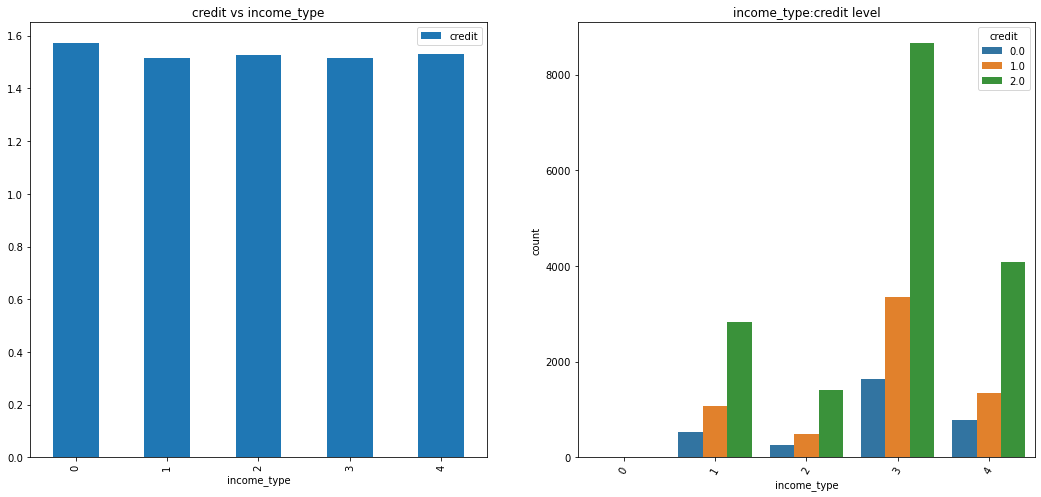

In [52]:
f,ax=plt.subplots(1,2,figsize=(18,8))
train[['income_type','credit']].groupby(['income_type']).mean().plot.bar(ax=ax[0])
ax[0].set_title('credit vs income_type')
sns.countplot('income_type',hue='credit',data=train,ax=ax[1])
ax[1].set_title('income_type:credit level')
plt.xticks(rotation=60)
plt.show()

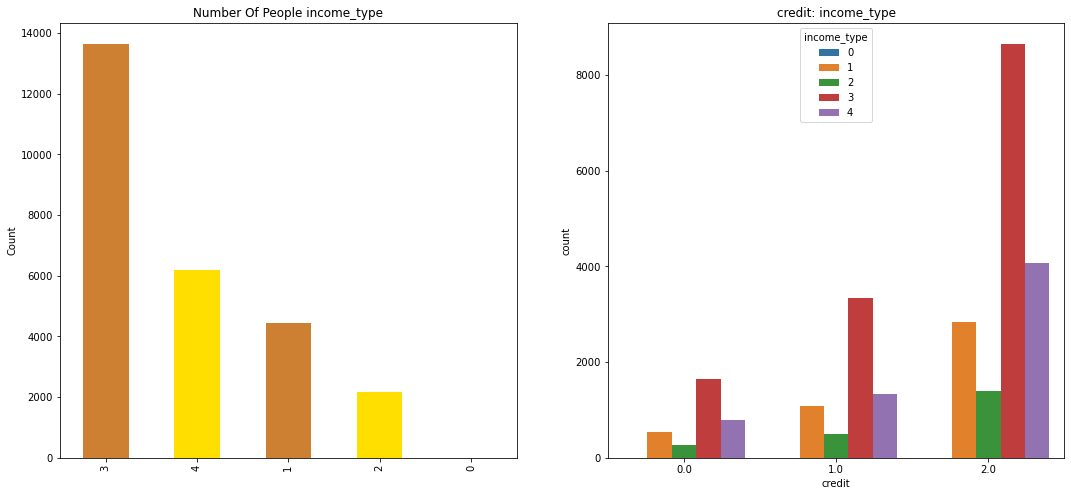

In [56]:
f,ax=plt.subplots(1,2,figsize=(18,8))
train['income_type'].value_counts().plot.bar(color=['#CD7F32','#FFDF00'],ax=ax[0])
ax[0].set_title('Number Of People income_type')
ax[0].set_ylabel('Count')
sns.countplot('credit',hue='income_type',data=train,ax=ax[1])
ax[1].set_title('credit: income_type')
plt.show()

In [45]:
train.groupby(['house_type', 'credit'])['credit'].count()

house_type  credit
0           0.0          24
            1.0          48
            2.0         118
1           0.0          50
            1.0         147
            2.0         232
2           0.0          14
            1.0          30
            2.0          66
3           0.0         151
            1.0         313
            2.0         793
4           0.0        2873
            1.0        5569
            2.0       15211
5           0.0         110
            1.0         160
            2.0         548
Name: credit, dtype: int64

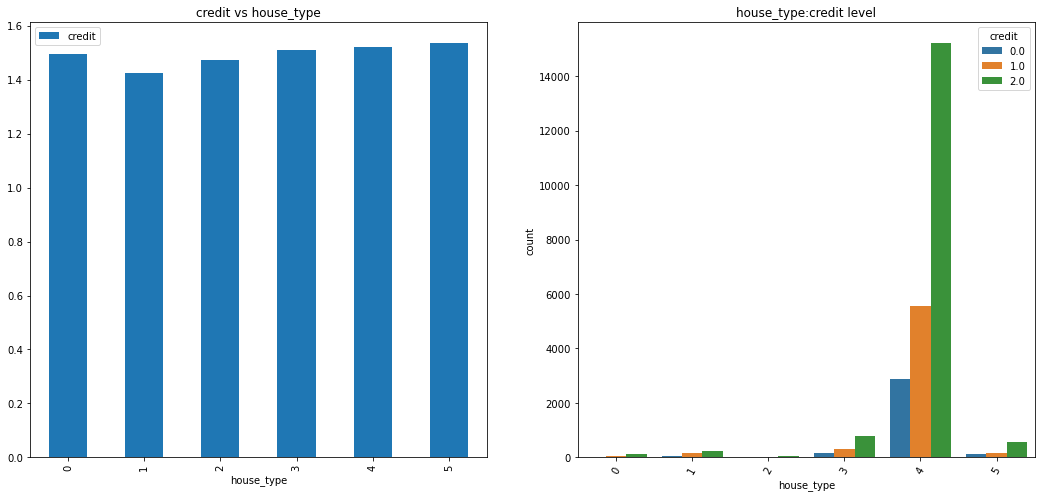

In [53]:
f,ax=plt.subplots(1,2,figsize=(18,8))
train[['house_type','credit']].groupby(['house_type']).mean().plot.bar(ax=ax[0])
ax[0].set_title('credit vs house_type')
sns.countplot('house_type',hue='credit',data=train,ax=ax[1])
ax[1].set_title('house_type:credit level')
plt.xticks(rotation=60)
plt.show()